<style type="text/css">
table td{
border:none;
}
</style>

<table>
    <tr>
        <td width=15%><img src="../img/logoIGE_Color_Light.jpg"></img></td>
        <td>
            <center>
                <h1>Machine Learning for prediciting RX localization</h1> <br>
                May - July 2022 <br>
                IGE internship
            </center>
            Renan MANCEAUX <br>
            Supervisor :<br>
            Thomas CHAUVE
        </td>
        <td width=20%><img src="../img/logo_UGA_imag.png"></img></td>
    </tr>
</table>

<center><h1> Exploration : Dimensional reduction </h1></center>

----------------------------

# Principal Components Analysis (PCA) on TJ dataset

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import sys
sys.path.append("../")
import utils

from sklearn.decomposition import PCA
import plotly.express as px

In [6]:
TJ_CI02 = utils.load_tj_data("../data/TJ/TJ_CI02.npy").dropna()
TJ_CI04 = utils.load_tj_data("../data/TJ/TJ_CI04.npy").dropna()
TJ_CI06 = utils.load_tj_data("../data/TJ/TJ_CI06.npy").dropna()
TJ_CI09 = utils.load_tj_data("../data/TJ/TJ_CI09.npy").dropna()
TJ_CI21 = utils.load_tj_data("../data/TJ/TJ_CI21.npy").dropna()

In [7]:
TJ_CI02['batch'] = ['CI02'] * np.shape(TJ_CI02)[0]
TJ_CI04['batch'] = ['CI04'] * np.shape(TJ_CI04)[0]
TJ_CI06['batch'] = ['CI06'] * np.shape(TJ_CI06)[0]
TJ_CI09['batch'] = ['CI09'] * np.shape(TJ_CI09)[0]
TJ_CI21['batch'] = ['CI21'] * np.shape(TJ_CI21)[0]

In [8]:
data = pd.concat((TJ_CI02,TJ_CI04,TJ_CI06,TJ_CI09,TJ_CI21))

In [9]:
data['RX'] = data['RX'].astype(object)
data['batch'] = data['batch'].astype(object)
X = data.loc[:,((data.columns != 'RX')&(data.columns != 'batch'))] 
y = data['RX']
b = data['batch']

In [10]:
norm_X = (X - X.mean())/X.std()
pca = PCA()
res_pca  = pca.fit(norm_X)

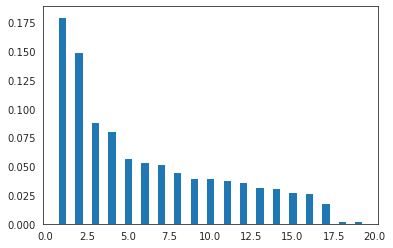

In [28]:
plt.bar(np.linspace(1,19,19),res_pca.explained_variance_ratio_,width=0.5)
plt.show()

In [12]:
components = pca.fit_transform(norm_X)

PCDf = pd.DataFrame(data = components
             , columns = ['PC 1', 'PC 2', 'PC 3', 'PC 4', 'PC 5','PC 6', 'PC 7', 'PC 8', 'PC 9', 'PC 10', 'PC 11', 'PC 12', 'PC 13', 'PC 14', 'PC 15', 'PC 16', 'PC 17', 'PC 18', 'PC 19'])


In [29]:
fig = px.scatter(PCDf[["PC 1","PC 2"]], x='PC 1', y='PC 2', color=b)

fig.update_layout(
    xaxis_title=f"PC 1 ({(pca.explained_variance_ratio_[0] * 100):.1f}%)",
    yaxis_title=f"PC 2 ({(pca.explained_variance_ratio_[1] * 100):.1f}%)",
    width = 800,
    height = 800
)
fig.show()

In [15]:
fig = px.scatter(PCDf[["PC 1","PC 2"]], x='PC 1', y='PC 2', color=y)

fig.update_layout(
    xaxis_title=f"PC 1 ({(pca.explained_variance_ratio_[0] * 100):.1f}%)",
    yaxis_title=f"PC 2 ({(pca.explained_variance_ratio_[1] * 100):.1f}%)",
    width = 800,
    height = 800
)
fig.show()

In [30]:
labels = {
    str(i): f"PC {i+1} ({var:.1f}%)"
    for i, var in enumerate(pca.explained_variance_ratio_ * 100)
}

fig = px.scatter_matrix(
    components,
    labels=labels,
    dimensions=range(4),
    color=b
)
fig.update_traces(diagonal_visible=False)

fig.update_layout(
    width = 700,
    height = 700
)
fig.show()

In [17]:
def filt(x,y, bins):
    x = np.array(x)
    y = np.array(y)

    d = np.digitize(x, bins)
    xfilt = []
    yfilt = []
    for i in np.unique(d):
        xi = x[d == i]
        yi = y[d == i]
        if len(xi) <= 2:
            xfilt.extend(list(xi))
            yfilt.extend(list(yi))
        else:
            xfilt.extend([xi[np.argmax(yi)], xi[np.argmin(yi)]])
            yfilt.extend([yi.max(), yi.min()])
    # prepend/append first/last point if necessary
    if x[0] != xfilt[0]:
        xfilt = [x[0]] + xfilt
        yfilt = [y[0]] + yfilt
    if x[-1] != xfilt[-1]:
        xfilt.append(x[-1])
        yfilt.append(y[-1])
    sort = np.argsort(xfilt)
    return np.array(xfilt)[sort], np.array(yfilt)[sort]

In [18]:
import warnings
warnings.filterwarnings('ignore')


In [ ]:
df = PCDf[['PC 1','PC 2']]
df['batch'] = np.array(b)
df['RX'] = np.array(y)

CP_CI02 = df.where(df.batch=='CI02').dropna()
CP_CI04 = df.where(df.batch=='CI04').dropna()
CP_CI06 = df.where(df.batch=='CI06').dropna()
CP_CI09 = df.where(df.batch=='CI09').dropna()
CP_CI21 = df.where(df.batch=='CI21').dropna()

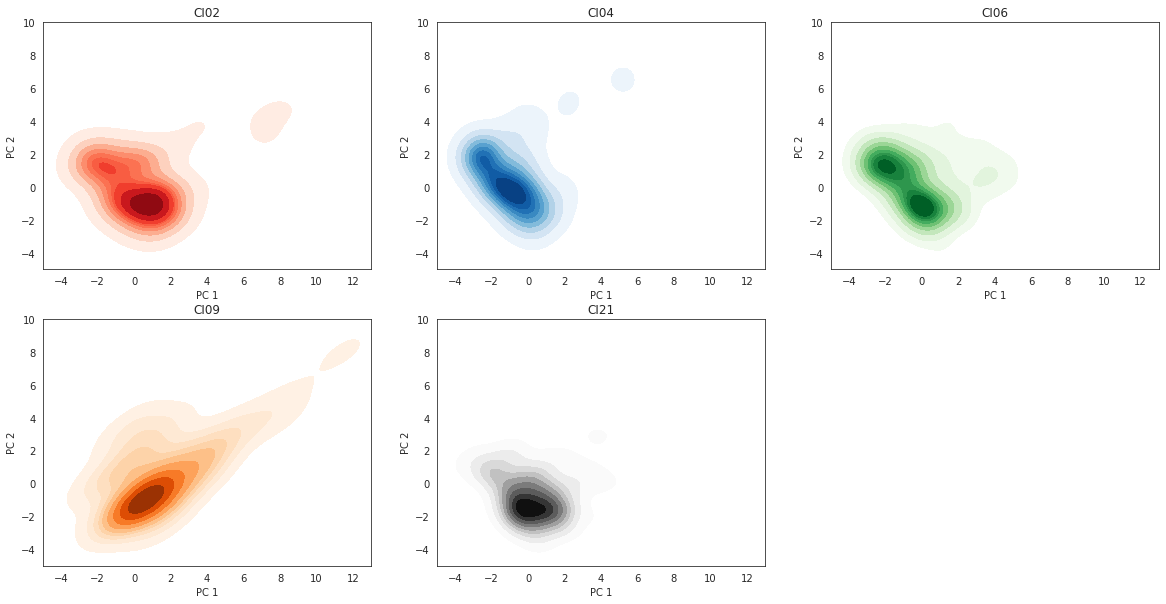

In [32]:
sns.set_style("white")
plt.figure(figsize=(20,10))
plt.subplot(231)

x = CP_CI02['PC 1']
y = CP_CI02['PC 2']
sns.kdeplot(x=x, y=y, cmap="Reds", shade=True)
plt.xlim([-5,13])
plt.ylim([-5,10])
plt.title("CI02")

plt.subplot(232)

x = CP_CI04['PC 1']
y = CP_CI04['PC 2']
sns.kdeplot(x=x, y=y, cmap="Blues", shade=True)
plt.xlim([-5,13])
plt.ylim([-5,10])
plt.title("CI04")

plt.subplot(233)

x = CP_CI06['PC 1']
y = CP_CI06['PC 2']
sns.kdeplot(x=x, y=y, cmap="Greens", shade=True)
plt.xlim([-5,13])
plt.ylim([-5,10])
plt.title("CI06")

plt.subplot(234)

x = CP_CI09['PC 1']
y = CP_CI09['PC 2']
sns.kdeplot(x=x, y=y, cmap="Oranges", shade=True)
plt.xlim([-5,13])
plt.ylim([-5,10])
plt.title("CI09")

plt.subplot(235)

x = CP_CI21['PC 1']
y = CP_CI21['PC 2']
sns.kdeplot(x=x, y=y, cmap="Greys", shade=True)
plt.xlim([-5,13])
plt.ylim([-5,10])
plt.title("CI21")

plt.show()

In [33]:
CP_y0 = df.where(df.RX==0).dropna()
CP_y1 = df.where(df.RX==1).dropna()

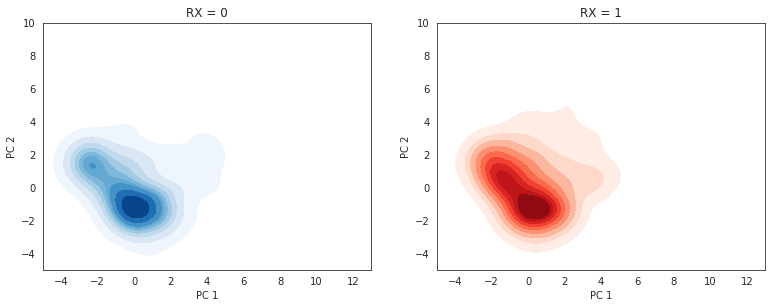

In [36]:
sns.set_style("white")
plt.figure(figsize=(20,10))
plt.subplot(231)

x = CP_y0['PC 1']
y = CP_y0['PC 2']
sns.kdeplot(x=x, y=y, cmap="Blues", shade=True)
plt.xlim([-5,13])
plt.ylim([-5,10])
plt.title("RX = 0")

plt.subplot(232)

x = CP_y1['PC 1']
y = CP_y1['PC 2']
sns.kdeplot(x=x, y=y, cmap="Reds", shade=True)
plt.xlim([-5,13])
plt.ylim([-5,10])
plt.title("RX = 1")

plt.show()

In [22]:
n = np.shape(norm_X)[0]
p = np.shape(norm_X)[1]
eigval = (n-1)/n*pca.explained_variance_
sqrt_eigval = np.sqrt(eigval)
corvar = np.zeros((p,p))
for k in range(p):
    corvar[:,k] = pca.components_[k,:] * sqrt_eigval[k]

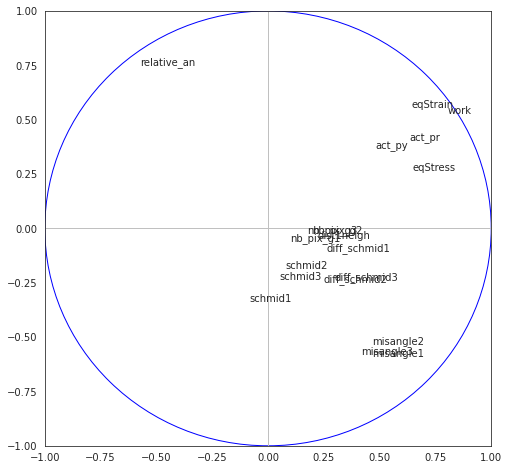

In [23]:
fig, axes = plt.subplots(figsize=(8,8))
axes.set_xlim(-1,1)
axes.set_ylim(-1,1)

for j in range(p):
    plt.annotate(X.columns[j],(corvar[j,0],corvar[j,1]))

plt.plot([-1,1],[0,0],color='silver',linestyle='-',linewidth=1)
plt.plot([0,0],[-1,1],color='silver',linestyle='-',linewidth=1)
cercle = plt.Circle((0,0),1,color='blue',fill=False)
axes.add_artist(cercle)

plt.show()

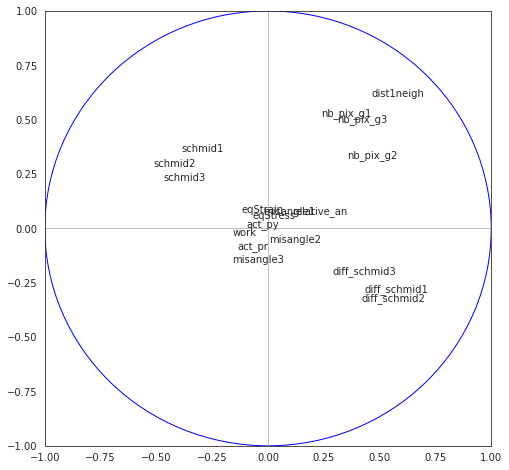

In [24]:
fig, axes = plt.subplots(figsize=(8,8))
axes.set_xlim(-1,1)
axes.set_ylim(-1,1)

for j in range(p):
    plt.annotate(X.columns[j],(corvar[j,2],corvar[j,3]))

plt.plot([-1,1],[0,0],color='silver',linestyle='-',linewidth=1)
plt.plot([0,0],[-1,1],color='silver',linestyle='-',linewidth=1)
cercle = plt.Circle((0,0),1,color='blue',fill=False)
axes.add_artist(cercle)

plt.show()